In [154]:
import pandas as pd
import numpy as np

In [155]:
data_19=pd.read_csv("Men Test Player Innings Stats - 19th Century.csv")
data_20=pd.read_csv("Men Test Player Innings Stats - 20th Century.csv")
data_21=pd.read_csv("Men Test Player Innings Stats - 21st Century.csv")

C:\Users\91701\AppData\Local\Temp\ipykernel_18760\2017227115.py:2: DtypeWarning: Columns (2,18,20,21,22,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data_20=pd.read_csv("Men Test Player Innings Stats - 20th Century.csv")


In [156]:
data_19['Century']='19th'
data_20['Century']='20th'
data_21['Century']='21st'

In [157]:
data_main=pd.concat([data_19,data_20,data_21])

In [158]:
data_main.duplicated().sum()

139497

In [159]:
data_main = data_main.drop_duplicates()

In [160]:
columns_to_convert=['Innings Runs Scored Num', 'Innings Batted Flag',
       'Innings Not Out Flag', 'Innings Balls Faced',
       'Innings Boundary Fours']
data_main[columns_to_convert] = data_main[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [161]:
Stats = data_main.groupby('Innings Player').agg({
    'Innings Runs Scored Num': 'sum',
    'Innings Batted Flag': 'sum',
    'Innings Not Out Flag': 'sum',
    'Innings Balls Faced': 'sum'
}).reset_index()


In [162]:
Stats['Test Average']=Stats['Innings Runs Scored Num']/(Stats['Innings Batted Flag']-Stats['Innings Not Out Flag'])

In [163]:
Stats=Stats[(Stats['Test Average']>=20) & (Stats['Innings Balls Faced']>=1000)]

35.44343735169499

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

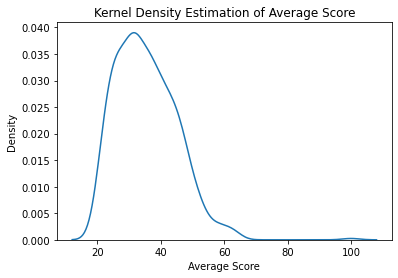

In [166]:
import seaborn as sns

# Assuming 'data_main' is a pandas DataFrame and 'Avg Score' is a column in it
avg_score = Stats['Test Average']

# Plotting the KDE plot
sns.kdeplot(data=avg_score)
plt.xlabel('Test Average')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Average Score')
plt.show()


In [181]:
import plotly.express as px
import plotly.graph_objects as go

# Create the box plot using Plotly
fig = go.Figure()

fig.add_trace(go.Box(
    y=Stats['Avg Score'],
    name='Test Average',
    boxpoints='outliers',
    marker=dict(color='skyblue'),
    line=dict(color='gray'),
    boxmean='sd'
))

# Add outlier annotations
outliers = Stats['Avg Score'][Stats['Avg Score'].apply(lambda x: x not in fig['data'][0]['y'])]
for i, value in enumerate(outliers):
    fig.add_annotation(
        x=1,
        y=value,
        text=str(value),
        showarrow=False,
        font=dict(color='red'),
    )

# Set layout
fig.update_layout(
    title='Boxplot of Average Scores',
    yaxis_title='Score',
    xaxis=dict(showticklabels=False),
)

# Display the plot
fig.show()


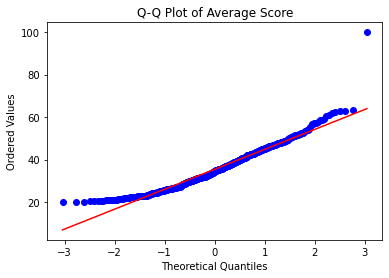

In [168]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'Stats' is a pandas DataFrame and 'Avg Score' is a column in it
avg_score = Stats['Avg Score']

# Generating the Q-Q plot
stats.probplot(avg_score, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot of Average Score')
plt.show()


In [184]:
Zscore=(Stats[Stats['Innings Player']=='DG Bradman']['Avg Score']-avg_score.mean())/avg_score.std()

In [185]:
Zscore

661    6.718867
Name: Avg Score, dtype: float64

In [187]:
Stats.sort_values(by='Avg Score',ascending=False)

,Innings Player,Innings Runs Scored Num,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Avg Score
661,DG Bradman,6996.0,80.0,10.0,9800.0,99.942857
1735,M Labuschagne,1459.0,23.0,0.0,2581.0,63.434783
2511,SG Barnes,1072.0,19.0,2.0,1990.0,63.058824
2571,SPD Smith,7227.0,131.0,16.0,13068.0,62.843478
2771,Taslim Arif,501.0,10.0,2.0,1042.0,62.625000
...,...,...,...,...,...,...
597,CZ Harris,777.0,42.0,4.0,2305.0,20.447368
1400,JG Bracewell,1001.0,60.0,11.0,2503.0,20.428571
682,DJ Murray,303.0,16.0,1.0,1027.0,20.200000
313,B Lee,1451.0,90.0,18.0,2739.0,20.152778


,Innings Player,Innings Runs Scored Num,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Avg Score
13,A Flower,4794.0,112.0,19.0,10636.0,51.548387
64,AB de Villiers,8765.0,191.0,18.0,16077.0,50.664740
75,AC Voges,1485.0,31.0,7.0,2667.0,61.875000
211,AR Border,11174.0,265.0,44.0,27002.0,50.561086
346,BC Lara,11912.0,230.0,6.0,19694.0,53.178571
484,CF Walters,784.0,18.0,3.0,1008.0,52.266667
647,DCS Compton,5807.0,131.0,15.0,2745.0,50.060345
661,DG Bradman,6996.0,80.0,10.0,9800.0,99.942857
773,E Paynter,1540.0,31.0,5.0,1288.0,59.230769
1091,GS Chappell,7110.0,151.0,19.0,13079.0,53.863636
